<a href="https://colab.research.google.com/github/HSE-LaMBDA/MLatURL2019/blob/master/02-Basics_of_data_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the seminar!

We hope you will enjoy it.


Artem, Alexey

# Outline of the seminar

* Introduction to Python (pre-seminar)
* Introduction to useful Python libraries (pre-seminar)
* **Basics of data handling**
 * pandas library
 * common file formats in HEP
* Performing maximum likelihood fit on a toy model
* Maximum likelihood fit on real data from CERN

# Basics of data handling

Prerequisites for this practice session are following:

* [Python](https://colab.research.google.com/github/yandexdataschool/MLatMISiS2018/blob/master/01_lab/00-Introduction_to_Python.ipynb)

* [Jupyter Notebooks](https://colab.research.google.com/github/yandexdataschool/MLatMISiS2018/blob/master/01_lab/00-Introduction_to_Python.ipynb#scrollTo=zWI1ypD96S1k)

* [NumPy](https://colab.research.google.com/github/yandexdataschool/MLatMISiS2018/blob/master/01_lab/01-Introduction_to_useful_Python_libraries.ipynb#scrollTo=cuMGoP0fRx0w)

* [Matplotlib](https://colab.research.google.com/github/yandexdataschool/MLatMISiS2018/blob/master/01_lab/01-Introduction_to_useful_Python_libraries.ipynb#scrollTo=FrJiGNF1irL2)

Note that links above lead to blank notebooks (the same as you see them on [GitHub repository](https://github.com/yandexdataschool/MLatMISiS2018)). In case you need the notebooks where you made changes/notes you should save them as .ipynb or copy to Google Drive (Colab only).

## Pandas 
pandas is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Pandas Dataframes**

One way of manipulating your data (slicing, filtering, removing variables, creating new features, taking operations of branches) in a simple, visually appealing way is to use `pandas` dataframes, a beatiful and efficient Python data structure library. Recommended for exploratory data analysis, probably not for high performance applications.


The main object here is `pandas.DataFrame` – a two-dimensional table of (possibly heterogeneous) data. There is a number a ways to create a `DataFrame`, but possibly one of the most common ways is to construct it by reading a text file of tabulated data with a specified delimiter (i.e. CSV files):

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yandexdataschool/MLatMISiS2018/master/01_lab/data/moscow_weather_2018-11-14.csv",
                 delimiter=';')
type(df)

pandas.core.frame.DataFrame

What is this? Weather in Moscow for last 2 weeks (taken from [here](https://www.meteoblue.com/en/weather/archive/export/moscow_russia_524901)).

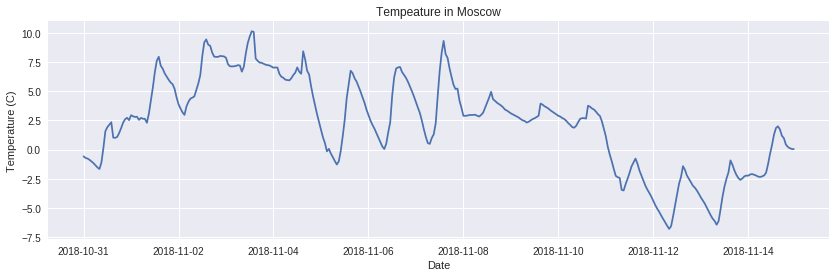

In [3]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]), df['Temperature  [2 m above gnd]'])
ax.axis('tight')
ax.set_title('Tempeature in Moscow')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (C)');

Let's dig into the data.

Look at the first N (5 by default) rows of the data:

In [4]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,2018,10,31,0,0,-0.58,0.0,21.41,106.61
1,2018,10,31,1,0,-0.72,0.0,21.29,108.74
2,2018,10,31,2,0,-0.77,0.0,21.29,108.74
3,2018,10,31,3,0,-0.88,0.0,21.63,108.43
4,2018,10,31,4,0,-1.02,0.0,22.67,110.45


Let's pick a rows from 3 to 10 and store the result as an independent copy of the original data:

In [5]:
small_df = df.loc[3:10].copy()
small_df

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
3,2018,10,31,3,0,-0.88,0.0,21.63,108.43
4,2018,10,31,4,0,-1.02,0.0,22.67,110.45
5,2018,10,31,5,0,-1.16,0.0,22.60,112.48
6,2018,10,31,6,0,-1.35,0.0,23.03,114.96
7,2018,10,31,7,0,-1.53,0.0,23.19,117.76
8,2018,10,31,8,0,-1.67,0.0,23.09,120.96
9,2018,10,31,9,0,-1.12,0.0,23.98,125.84
10,2018,10,31,10,0,0.11,0.0,24.76,130.87


Note that small_df has index starting from 3:

In [6]:
small_df.index

RangeIndex(start=3, stop=11, step=1)

Indexing with '.loc' uses that index, also it includes the last element of the slice:

In [7]:
small_df.loc[4:5]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
4,2018,10,31,4,0,-1.02,0.0,22.67,110.45
5,2018,10,31,5,0,-1.16,0.0,22.60,112.48


While using just [4:5] selects the row, which is 4'th from the beginning
of current `DataFrame` (it's index is 7), and it excludes the last element
of the slice:

In [8]:
small_df[4:5]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
7,2018,10,31,7,0,-1.53,0.0,23.19,117.76


You can list the column names:

In [9]:
small_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Temperature  [2 m above gnd]',
       'Total Precipitation (high resolution)  [sfc]',
       'Wind Speed  [10 m above gnd]', 'Wind Direction  [10 m above gnd]'],
      dtype='object')

And easily select them:

In [10]:
small_df['Temperature  [2 m above gnd]']

3    -0.88
4    -1.02
5    -1.16
6    -1.35
7    -1.53
8    -1.67
9    -1.12
10    0.11
Name: Temperature  [2 m above gnd], dtype: float64

Or select a group of columns (note the nested [] brackets):

In [11]:
small_df[['Hour', 'Temperature  [2 m above gnd]']]

,Hour,Temperature [2 m above gnd]
3,3,-0.88
4,4,-1.02
5,5,-1.16
6,6,-1.35
7,7,-1.53
8,8,-1.67
9,9,-1.12
10,10,0.11


**Exercise**. Try to select days with some rain. And the same excluding weekends?

You can even add new columns:

In [34]:
small_df['T_squared'] = small_df['Temperature  [2 m above gnd]']**2
small_df['T_squared']

3     0.7744
4     1.0404
5     1.3456
6     1.8225
7     2.3409
8     2.7889
9     1.2544
10    0.0121
Name: T_squared, dtype: float64

**Exercise**. Figure out some interesting new column. Can it be physically-motivated?

3     19.12
4     18.98
5     18.84
6     18.65
7     18.47
8     18.33
9     18.88
10    20.11
Name: T_squared2, dtype: float64

You can select rows with boolean indices:

In [40]:
small_df[[False, True, False, False, False, False, False, False]]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],T_squared,T_squared2
4,2018,10,31,4,0,-1.02,0.0,22.67,110.45,1.0404,18.98


Obviously, spelling out this list of True and False values is not very practical.
However one can get such list from some selection, e.g.:

In [41]:
small_df['T_squared'] > 2.0

3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
Name: T_squared, dtype: bool

And hence the selection can be done like this:

In [37]:
small_df[small_df['T_squared'] > 2.0]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],T_squared
7,2018,10,31,7,0,-1.53,0.0,23.19,117.76,2.3409
8,2018,10,31,8,0,-1.67,0.0,23.09,120.96,2.7889


# Common file formats in HEP


## ROOT

ROOT as file format of the [same name software toolkit](https://root.cern.ch/) is unavoidable in experimental particle physics.
ROOT is de facto standard tool designed by CERN for particle physics data processing, statistical analysis, visualisation and storage. ROOT is alrealdy built into hundreds other projects in HEP.

Advantages:
* Really easy to make histograms
* `TTree::Draw()`
* Ability to process files >~1 TB without issue

Disadvantages:
* ~ 3 million lines of C++ code
* 100% non-transferable skill
* Small user community

A ROOT file is like a file directory. It can contain directories and objects organized in unlimited number of levels.
ROOT file can represent **different data structures**!
Structured tree and n-tuple (an ordered list of n elements) are most frequent.

Possible ways to use ROOT from Python:
* ~~[pyROOT](https://root.cern.ch/pyroot)~~ (requires ROOT)
* ~~[rootpy](http://www.rootpy.org/)~~ (requires ROOT and pyROOT)
* ~~[root_numpy](http://scikit-hep.org/root_numpy)~~ (requires ROOT and NumPy)
* [uproot](https://github.com/scikit-hep/uproot)(requres just NumPy) — **it's our workaround!**

Let's install uproot, and download two example ROOT files:

In [16]:
!pip install uproot
import uproot
!wget http://scikit-hep.org/uproot/examples/Zmumu.root
!wget http://scikit-hep.org/uproot/examples/HZZ.root

--2018-11-14 11:42:58--  http://scikit-hep.org/uproot/examples/Zmumu.root
Resolving scikit-hep.org (scikit-hep.org)... 192.30.252.153
Connecting to scikit-hep.org (scikit-hep.org)|192.30.252.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178971 (175K) [application/octet-stream]
Saving to: ‘Zmumu.root.1’

Zmumu.root.1        100%[===================>] 174.78K   698KB/s    in 0.3s    

2018-11-14 11:42:58 (698 KB/s) - ‘Zmumu.root.1’ saved [178971/178971]

--2018-11-14 11:43:01--  http://scikit-hep.org/uproot/examples/HZZ.root
Resolving scikit-hep.org (scikit-hep.org)... 192.30.252.153
Connecting to scikit-hep.org (scikit-hep.org)|192.30.252.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217945 (213K) [application/octet-stream]
Saving to: ‘HZZ.root.1’

HZZ.root.1          100%[===================>] 212.84K   845KB/s    in 0.3s    

2018-11-14 11:43:01 (845 KB/s) - ‘HZZ.root.1’ saved [217945/217945]



*Zmumu.root* is an example of flat n-tuple of $Z \rightarrow \mu\mu$ events.

uproot presents such data structure as  [dict-like objects](https://colab.research.google.com/github/yandexdataschool/MLatMISiS2018/blob/master/01_lab/00-Introduction_to_Python.ipynb#scrollTo=L6xLtIk7a9My) with ROOT names and objects as keys and values.

In [0]:
zmumu = uproot.open("Zmumu.root")["events"]

Since the file acts as a dictionaries, we accessed them with square brackets.


*HZZ.root* is structured TTree of $H \rightarrow ZZ \rightarrow ee\mu\mu$ events. TTrees are also dict-like objects, with branch names and branches as keys and values.

In [0]:
hzz = uproot.open("HZZ.root")["events"]

You easily can inspect zmumu file:

(Hint: allkeys() lists branches recursively, if they're nested.)

In [19]:
zmumu.keys()

[b'Type',
 b'Run',
 b'Event',
 b'E1',
 b'px1',
 b'py1',
 b'pz1',
 b'pt1',
 b'eta1',
 b'phi1',
 b'Q1',
 b'E2',
 b'px2',
 b'py2',
 b'pz2',
 b'pt2',
 b'eta2',
 b'phi2',
 b'Q2',
 b'M']

And hzz:

In [20]:
hzz.keys()

[b'NJet',
 b'Jet_Px',
 b'Jet_Py',
 b'Jet_Pz',
 b'Jet_E',
 b'Jet_btag',
 b'Jet_ID',
 b'NMuon',
 b'Muon_Px',
 b'Muon_Py',
 b'Muon_Pz',
 b'Muon_E',
 b'Muon_Charge',
 b'Muon_Iso',
 b'NElectron',
 b'Electron_Px',
 b'Electron_Py',
 b'Electron_Pz',
 b'Electron_E',
 b'Electron_Charge',
 b'Electron_Iso',
 b'NPhoton',
 b'Photon_Px',
 b'Photon_Py',
 b'Photon_Pz',
 b'Photon_E',
 b'Photon_Iso',
 b'MET_px',
 b'MET_py',
 b'MChadronicBottom_px',
 b'MChadronicBottom_py',
 b'MChadronicBottom_pz',
 b'MCleptonicBottom_px',
 b'MCleptonicBottom_py',
 b'MCleptonicBottom_pz',
 b'MChadronicWDecayQuark_px',
 b'MChadronicWDecayQuark_py',
 b'MChadronicWDecayQuark_pz',
 b'MChadronicWDecayQuarkBar_px',
 b'MChadronicWDecayQuarkBar_py',
 b'MChadronicWDecayQuarkBar_pz',
 b'MClepton_px',
 b'MClepton_py',
 b'MClepton_pz',
 b'MCleptonPDGid',
 b'MCneutrino_px',
 b'MCneutrino_py',
 b'MCneutrino_pz',
 b'NPrimaryVertices',
 b'triggerIsoMu24',
 b'EventWeight']

You can turn a chosen set of branches into NumPy arrays with the `arrays` method. Each array represents the values of a single attribute for all events, just as they're stored in a split ROOT file.

In [21]:
zmumu.arrays(["px1", "py1", "pz1"])

{b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

If the number of items per entry is not constant, such as the number of jets in an event, they can't be expressed as flat NumPy arrays. Instead, uproot loads them into *jagged arrays*.

In [22]:
hzz.array("Jet_E")

<JaggedArray [[] [44.137363] [] ... [55.95058] [229.57799  33.92035] []] at 7f0b2d7cbda0>

A jagged array behaves like an array of unequal-length arrays:

In [23]:
jaggedarray = hzz.array("Jet_E")
print(jaggedarray.content)
print(jaggedarray.starts)
print(jaggedarray.stops)

[ 44.137363 230.34601  101.35884  ...  55.95058  229.57799   33.92035 ]
[   0    0    1 ... 2770 2771 2773]
[   0    1    1 ... 2771 2773 2773]


uproot has connectors to other libraries.  For instance, to get a pandas DataFrame, call tree.pandas.df:

In [24]:
zmumu.pandas.df(["pt1", "eta1", "phi1", "pt2", "eta2", "phi2"])

,pt1,eta1,phi1,pt2,eta2,phi2
0,44.7322,-1.217690,2.741260,38.8311,-1.051390,-0.440873
1,38.8311,-1.051390,-0.440873,44.7322,-1.217690,2.741260
2,38.8311,-1.051390,-0.440873,44.7322,-1.217690,2.741260
3,38.8311,-1.051390,-0.440873,44.7322,-1.217690,2.741260
4,27.2981,-0.990688,0.583351,21.8913,1.444340,-2.707650
5,21.8913,1.444340,-2.707650,27.2981,-0.990688,0.583351
6,21.8913,1.444340,-2.707650,27.2981,-0.990688,0.583351
7,21.8913,1.444340,-2.707650,27.2981,-0.990688,0.583351
8,77.0336,-1.140270,0.393582,72.7634,-0.637934,-0.793162
9,72.7634,-0.637934,-0.793162,77.0336,-1.140270,0.393582


##  HDF5

HDF5 - [Hierarchical Data Format](https://www.hdfgroup.org/) (you also can meet .hdf, .h5 file extensions for it).

HDF5 include two major types of object:
* *Datasets*, which are multidimensional arrays of a homogeneous type
* *Groups*, which are container structures which can hold datasets and other groups

It's very easy to use HDF5 in Python via [h5py](https://www.h5py.org) library:


In [0]:
#!pip install h5py
import h5py
import numpy as np

Let's create a dataset using h5py:

In [0]:
arr = np.random.randn(1000)

with h5py.File('random.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=arr)

And read it:

In [27]:
with h5py.File('random.hdf5', 'r') as f:
  data = f['default']
  print(data.shape)
  print(data.dtype)

(1000,)
float64


One can see object we obtained isn’t an array, but an HDF5 dataset. Like NumPy arrays, datasets have both a shape and a data type.

Now let's try selective reading from HDF5 dataset:

In [28]:
with h5py.File('random.hdf5', 'r') as f:
   data_set = f['default']
   data = data_set[:10]
print(data[1])

-0.0465490693584507


HDF5 is very flexible file format. It can easily handle parallel processes. Writing to HDF5 also can be selective. HDF5 allows compression, chunked writing and writing on-the-fly.

# Additional material

# SciPy - scientific algorithms for Python

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions (scipy.special)
* Integration (scipy.integrate)
* Optimization (scipy.optimize)
* Interpolation (scipy.interpolate)
* Fourier Transforms (scipy.fftpack)
* Signal Processing (scipy.signal)
* Linear Algebra (scipy.linalg)
* Sparse Eigenvalue Problems (scipy.sparse)
* Statistics (scipy.stats)
* Multi-dimensional image processing (scipy.ndimage)
* File IO (scipy.io)

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing the scipy module.

In [0]:
import scipy

If we only need to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name la, we can do:

In [0]:
import scipy.linalg as la

Note: there is  no performance difference between the two approaches of importing modules. The choice between one or the other then, should be based on coding style instead.

## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc.

Detailed documetation is available at: [http://docs.scipy.org/doc/scipy/reference/linalg.html](http://docs.scipy.org/doc/scipy/reference/linalg.html)

Here we will look at how to use some of these functions:

## Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:


In [31]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

from scipy import linalg
x = linalg.solve(A, b)

x

array([ 2., -2.,  9.])

In [32]:
# check
dot(A, x) - b

NameError: ignored

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:


In [0]:
A = scipy.rand(3,3)
B = scipy.rand(3,3)

X = linalg.solve(A, B)

X

array([[ 1.16873326e+00,  7.17951462e-01,  9.61427451e-01],
       [ 5.30024666e-03,  1.23844125e+00,  1.06726557e-01],
       [-1.39727856e+00, -6.53317970e+00, -2.65651400e+00]])

## Statistics

The scipy.stats module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see [http://docs.scipy.org/doc/scipy/reference/stats.html](http://docs.scipy.org/doc/scipy/reference/stats.html).

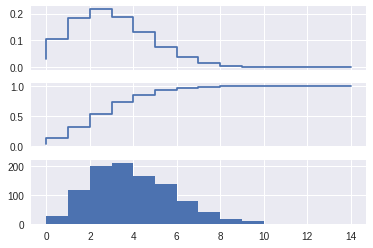

In [0]:
from scipy import stats

# create a (discreet) random variable with poissionian distribution
X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

## Statistical tests
Test if two sets of (independent) random data comes from the same distribution:

In [0]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print("t-statistic =", t_statistic)
print("p-value =", p_value)

t-statistic = -1.8242625219734867
p-value = 0.06826168283706106


Since the p value is very large we cannot reject the hypothesis that the two sets of random data have different means.

To test if the mean of a single sample of data has mean 0.1 (the true mean is 3.5):


In [0]:
stats.ttest_1samp(X.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=56.51227857703516, pvalue=2.0490612731e-313)

# More on Pandas

## Object Creation

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [0]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [0]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,-1.359722,-0.515774,1.396831,-0.064067
2013-01-02,1.215245,0.202695,-1.089379,0.307725
2013-01-03,0.489987,-0.385811,-0.764385,-2.183181
2013-01-04,0.680014,0.298680,-1.469834,-1.835706
2013-01-05,0.856720,0.281778,0.175882,1.163814
2013-01-06,-0.136092,-0.416611,2.446754,1.668228


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [0]:
df2 = pd.DataFrame({ 'A' : 1.,
	'B' : pd.Timestamp('20130102'),
	'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
	'D' : np.array([3] * 4,dtype='int32'),
	'E' : pd.Categorical(["test","train","test","train"]),
	'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [0]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [0]:
df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

Here is how to view the top and bottom rows of the frame:

In [0]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,2018,11,4,0,0,7.03,0.6,14.76,257.32
1,2018,11,4,1,0,7.05,0.2,14.49,255.62
2,2018,11,4,2,0,7.04,0.0,14.35,252.47
3,2018,11,4,3,0,6.49,0.0,16.10,259.70
4,2018,11,4,4,0,6.25,0.0,17.29,267.61


In [0]:
df.tail(3)

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
189,2018,11,11,21,0,-3.60,0.0,21.61,119.98
190,2018,11,11,22,0,-3.85,0.0,21.87,122.91
191,2018,11,11,23,0,-4.04,0.0,21.68,125.54


Display the index, columns, and the underlying NumPy data:

In [0]:
df.index

RangeIndex(start=0, stop=192, step=1)

In [0]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Temperature  [2 m above gnd]', 'Total Precipitation  [sfc]',
       'Wind Speed  [10 m above gnd]', 'Wind Direction  [10 m above gnd]'],
      dtype='object')

In [0]:
df.values

array([[2.0180e+03, 1.1000e+01, 4.0000e+00, ..., 6.0000e-01, 1.4760e+01,
        2.5732e+02],
       [2.0180e+03, 1.1000e+01, 4.0000e+00, ..., 2.0000e-01, 1.4490e+01,
        2.5562e+02],
       [2.0180e+03, 1.1000e+01, 4.0000e+00, ..., 0.0000e+00, 1.4350e+01,
        2.5247e+02],
       ...,
       [2.0180e+03, 1.1000e+01, 1.1000e+01, ..., 0.0000e+00, 2.1610e+01,
        1.1998e+02],
       [2.0180e+03, 1.1000e+01, 1.1000e+01, ..., 0.0000e+00, 2.1870e+01,
        1.2291e+02],
       [2.0180e+03, 1.1000e+01, 1.1000e+01, ..., 0.0000e+00, 2.1680e+01,
        1.2554e+02]])

describe() shows a quick statistic summary of your data:

In [0]:
df.describe()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
count,192.0,192.0,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000
mean,2018.0,11.0,7.500000,11.500000,0.0,2.961406,0.004167,11.575833,189.998958
std,0.0,0.0,2.297278,6.940284,0.0,2.814121,0.045572,7.412555,84.645082
min,2018.0,11.0,4.000000,0.000000,0.0,-4.040000,0.000000,1.800000,35.540000
25%,2018.0,11.0,5.750000,5.750000,0.0,1.740000,0.000000,6.350000,99.112500
50%,2018.0,11.0,7.500000,11.500000,0.0,2.975000,0.000000,8.660000,218.985000
75%,2018.0,11.0,9.250000,17.250000,0.0,4.712500,0.000000,16.345000,270.297500
max,2018.0,11.0,11.000000,23.000000,0.0,9.330000,0.600000,30.120000,360.000000


# seaborn: statistical data visualization

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

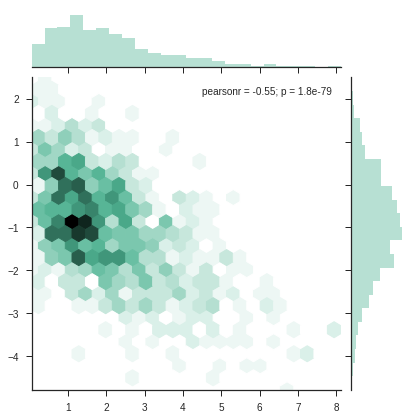

In [0]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

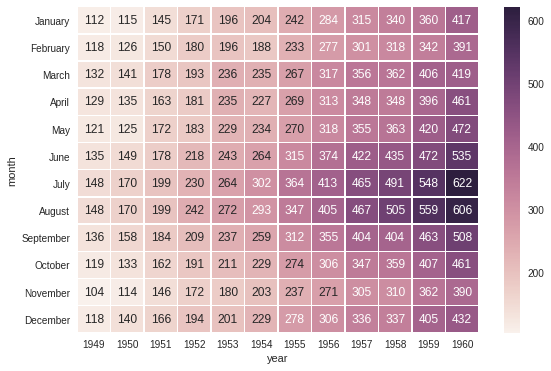

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)